In [1]:
import pandas as pd

In [2]:
EXCEL_PATH = "/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Daten/crypto_7years_daily.xlsx"

In [3]:
import pandas as pd
from backtester import Backtester
from strategies.simple_moving_average_long import TrendFollowingStrategy
from strategies.mean_reversion import MeanReversionStrategy

strategy_class = TrendFollowingStrategy
param_grid = {
    "window": range(10,300,50),
}
initial_cash = 10000

# Load all sheet names (one per asset)
xls = pd.read_excel(EXCEL_PATH,sheet_name="Cleaned data", parse_dates=["DATES"])
xls.drop_duplicates(inplace=True)
xls.set_index("DATES", inplace=True)

from itertools import product

def get_param_combinations(grid):
    keys = list(grid.keys())
    values = list(grid.values())
    for combo in product(*values):
        yield dict(zip(keys, combo))

results = []


In [4]:
xls=xls[xls.index >= "2022-01-01"]

In [5]:
xls.head()

,Enjin Coin,Maker,Solana,Cardano,Monero,Litecoin,Dogecoin,Chainlink,Bitcoin,XRP,...,Tether,Dai,USD Coin,Basic Attention Token,Cosmos,Cosmos.1,TerraUSD,Decentraland,Shiba Inu,Aave
DATES,,,,,,,,,,,,,,,,,,,,,
2022-01-01,2.6836,2420.7603,NaN,NaN,250.390,149.808,NaN,NaN,47333.20,0.8461,...,1.0007,0.9999,1.0003,NaN,40.1968,40.1968,NaN,3.3480,0.000034,266.6987
2022-01-02,2.8626,2473.3455,NaN,NaN,236.590,150.448,NaN,NaN,47028.52,0.8531,...,1.0011,0.9999,1.0001,NaN,40.1945,40.1945,NaN,3.3393,0.000034,265.5302
2022-01-03,2.7914,2389.3404,NaN,NaN,226.958,147.195,NaN,NaN,45997.26,0.8286,...,1.0001,1.0000,0.9998,NaN,40.2729,40.2729,NaN,3.2489,0.000033,266.6063
2022-01-04,2.6884,2445.1221,NaN,NaN,224.810,147.648,NaN,NaN,46220.42,0.8286,...,1.0001,0.9999,1.0000,NaN,41.4050,41.4050,NaN,3.1746,0.000032,252.4400
2022-01-05,2.4400,2232.6455,NaN,NaN,207.808,136.172,NaN,NaN,43603.88,0.7910,...,1.0002,0.9998,1.0000,NaN,38.0091,38.0091,NaN,2.9135,0.000030,230.1562


In [6]:
#get columns names in the dataframe
assets = xls.columns.tolist()

In [7]:
#calculate silence for each asset
# and run backtesting for each combination of parameters
for asset in assets:
    df = xls[[asset]]
    for params in get_param_combinations(param_grid):
        strategy = strategy_class(df.columns[0],**params)

        bt = Backtester(
            data=df.copy(),  # changed from file path to raw data
            strategy=strategy,
            initial_cash=initial_cash
        )
        bt.run()
        bt.evaluate(silent=True)

        result = {
            "asset": asset,
            **params,
            **bt.get_performance_metrics()  # e.g., return, sharpe
        }

        results.append(result)

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df.sort_values(by="sharpe", ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)
results_df.head(50)


,asset,window,total_return,annualized_return,sharpe,max_drawdown,avg_trade_return,avg_trade_return_long,avg_trade_return_short,skewness,num_trades,total_fees_paid,fees_as_pct_of_gross
0,Solana,10,5.9257,1.5922,1.66,-0.2841,-0.02558,-0.05075,N/A,0.197,66,0.0264,1.35
1,Solana,60,2.8945,0.9526,1.12,-0.5653,-0.02954,-0.05867,N/A,0.512,32,0.0128,0.93
2,Bitcoin,110,2.6595,0.3243,0.98,-0.2478,-0.01428,-0.02816,N/A,0.674,28,0.0112,0.86
3,Dogecoin,10,3.8887,0.5610,0.76,-0.4610,-0.02083,-0.04125,N/A,2.495,158,0.0632,3.83
4,Bitcoin,160,1.8495,0.2545,0.76,-0.3181,-0.01822,-0.03603,N/A,0.418,28,0.0112,1.06
5,Bitcoin,210,1.7636,0.2462,0.72,-0.2924,-0.01436,-0.02832,N/A,0.435,24,0.0096,0.94
6,Stacks,110,6.6710,0.5568,0.71,-0.4801,-0.02576,-0.05112,N/A,2.077,22,0.0088,0.43
7,Wrapped Bitcoin,10,0.5048,0.2503,0.71,-0.2425,-0.01506,-0.02972,N/A,0.605,78,0.0312,7.09
8,Wrapped Bitcoin,60,0.5144,0.2547,0.70,-0.3449,-0.01558,-0.03075,N/A,0.722,26,0.0104,2.44
9,Dogecoin,110,2.4473,0.4152,0.63,-0.4292,-0.02493,-0.04947,N/A,0.803,30,0.0120,0.96


In [8]:
results_df[results_df["asset"] == 'Bitcoin'].sort_values(by="window", ascending=False)

,asset,window,total_return,annualized_return,sharpe,max_drawdown,avg_trade_return,avg_trade_return_long,avg_trade_return_short,skewness,num_trades,total_fees_paid,fees_as_pct_of_gross
11,Bitcoin,260,1.4985,0.2193,0.62,-0.3430,-0.01648,-0.03402,N/A,0.318,23,0.0092,0.99
5,Bitcoin,210,1.7636,0.2462,0.72,-0.2924,-0.01436,-0.02832,N/A,0.435,24,0.0096,0.94
4,Bitcoin,160,1.8495,0.2545,0.76,-0.3181,-0.01822,-0.03603,N/A,0.418,28,0.0112,1.06
2,Bitcoin,110,2.6595,0.3243,0.98,-0.2478,-0.01428,-0.02816,N/A,0.674,28,0.0112,0.86
15,Bitcoin,60,0.9954,0.1613,0.52,-0.4030,-0.02159,-0.04277,N/A,-0.027,50,0.0200,2.81
146,Bitcoin,10,-0.0104,-0.0023,-0.01,-0.4327,-0.01514,-0.02989,N/A,-0.011,214,0.0856,113.89


/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


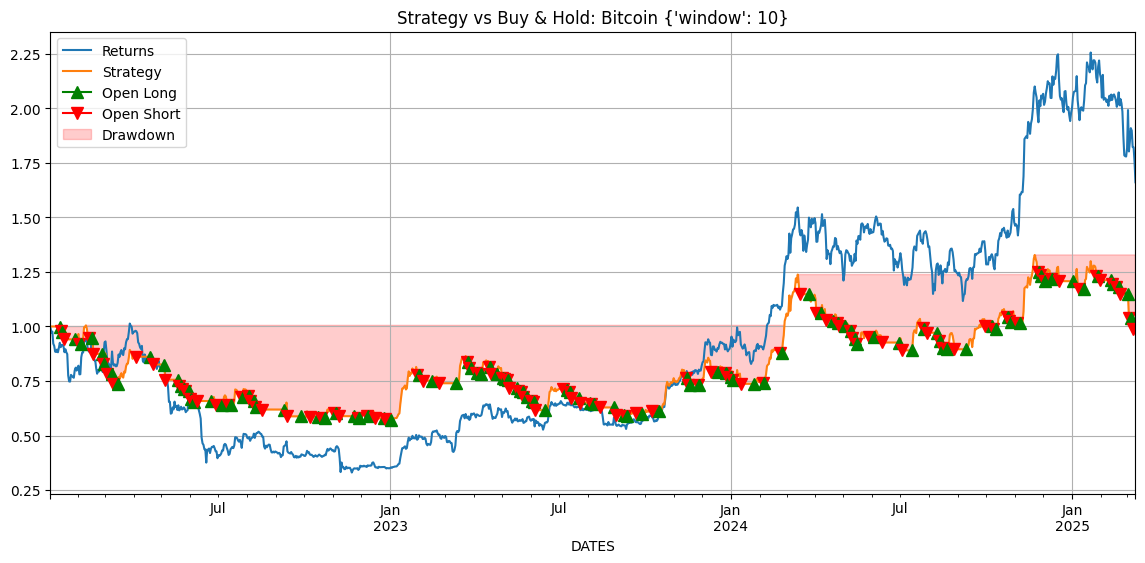

/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


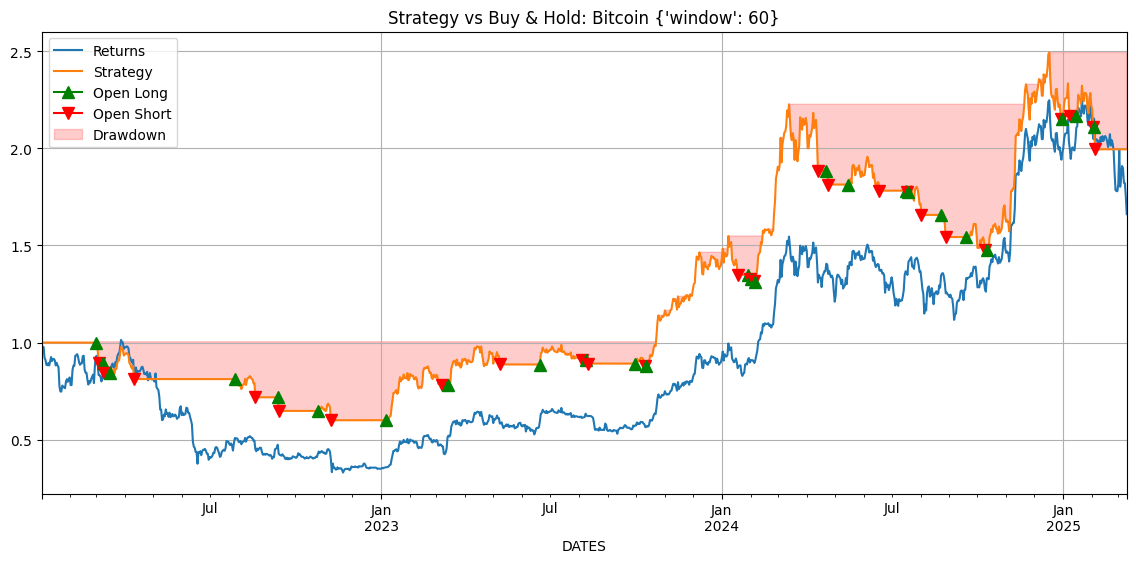

/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


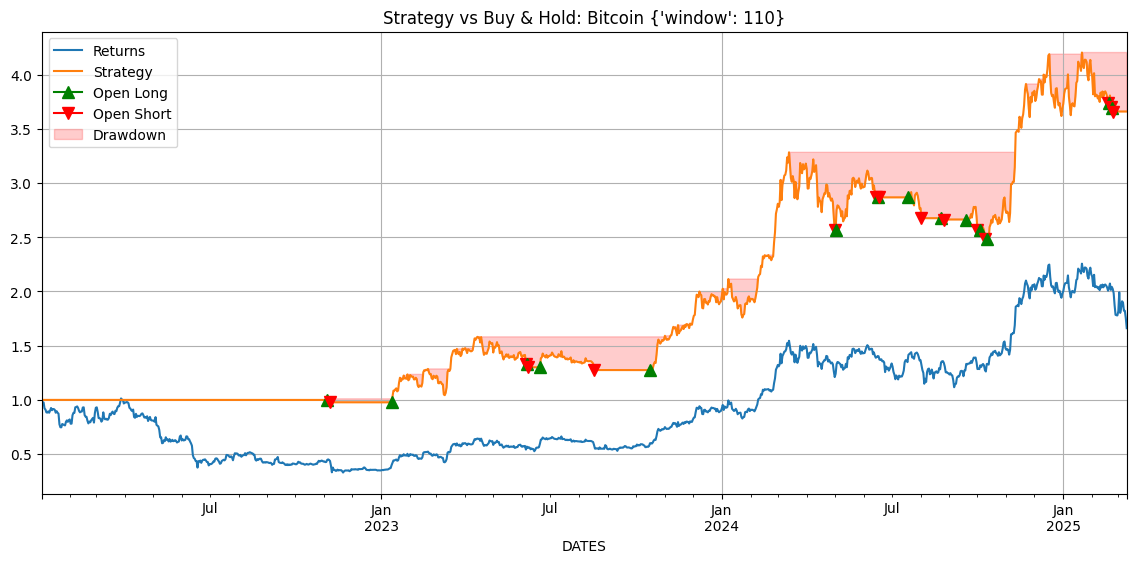

/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


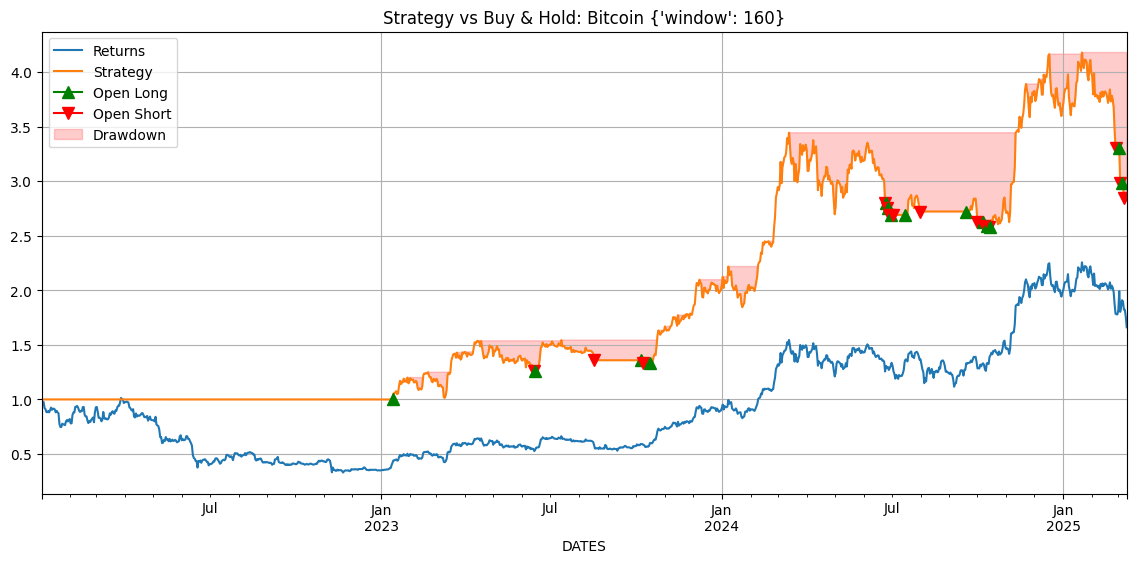

/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


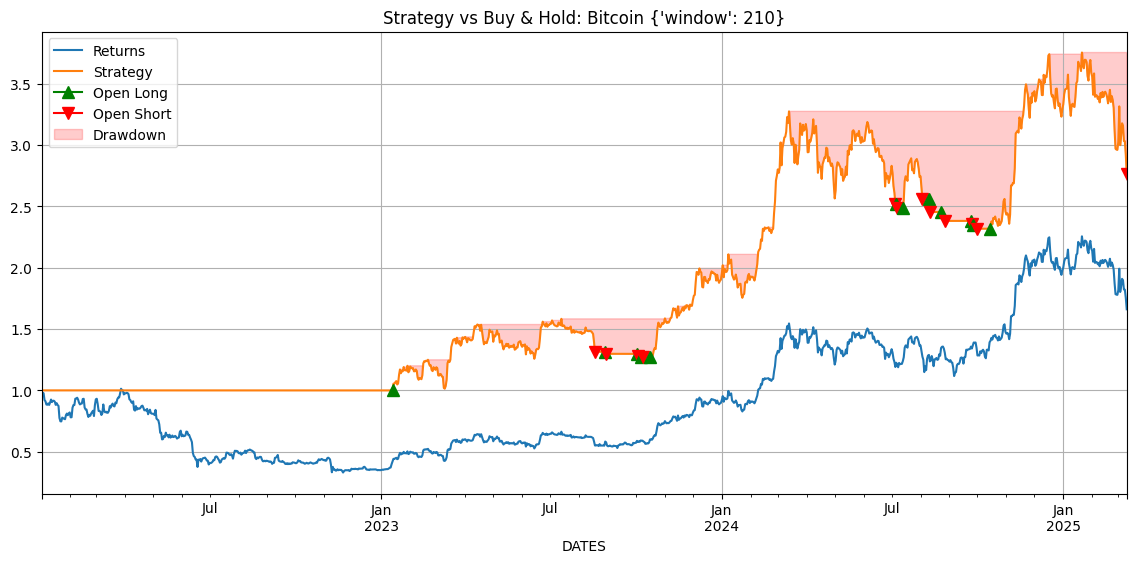

/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:65: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = np.exp(self.results.loc[:idx, "Strategy"].cumsum())[-1]


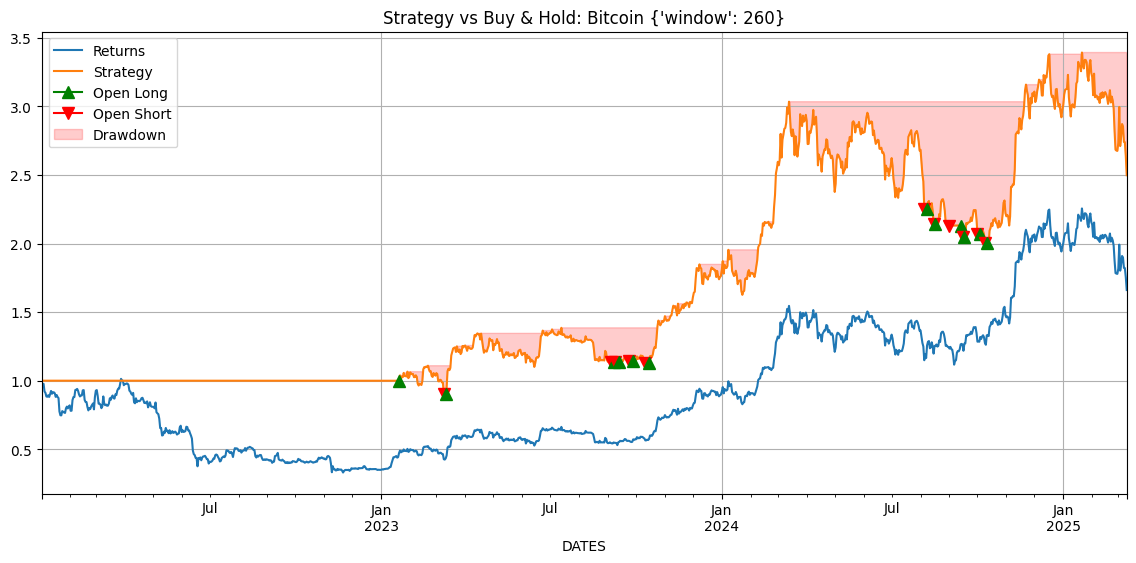

     asset  window  total_return  annualized_return  sharpe  max_drawdown  \
0  Bitcoin     110        2.6595             0.3243    0.98       -0.2478   
1  Bitcoin     160        1.8495             0.2545    0.76       -0.3181   
2  Bitcoin     210        1.7636             0.2462    0.72       -0.2924   
3  Bitcoin     260        1.4985             0.2193    0.62       -0.3430   
4  Bitcoin      60        0.9954             0.1613    0.52       -0.4030   
5  Bitcoin      10       -0.0104            -0.0023   -0.01       -0.4327   

   avg_trade_return  avg_trade_return_long avg_trade_return_short  skewness  \
0          -0.01428               -0.02816                    N/A     0.674   
1          -0.01822               -0.03603                    N/A     0.418   
2          -0.01436               -0.02832                    N/A     0.435   
3          -0.01648               -0.03402                    N/A     0.318   
4          -0.02159               -0.04277                    N/A

In [9]:
assets=['Bitcoin']
new_results = []
for asset in assets:
    df = xls[[asset]]
    for params in get_param_combinations(param_grid):
        strategy = strategy_class(df.columns[0],**params)

        bt = Backtester(
            data=df.copy(),
            strategy=strategy,
            initial_cash=initial_cash
        )
        bt.run()
        bt.evaluate(silent=True)
        bt.plot(params=params)

        result = {
            "asset": asset,
            **params,
            **bt.get_performance_metrics()
        }

        new_results.append(result)

# Convert results to DataFrame
new_results_df = pd.DataFrame(new_results)
new_results_df.sort_values(by="total_return", ascending=False, inplace=True)
new_results_df.reset_index(drop=True, inplace=True)
print(new_results_df)